In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pickle

In [2]:
df = pd.read_csv("C:\\Users\\akelo\\Desktop\\PROJECT_ONE\\Bank-Customer-Attrition-Insights-Data.csv")

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


df.info()

In [7]:
# NOW LET ME START DOING THE DATA PREPARATION
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [8]:
#I want to make the data uniform
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [9]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')
df.head().T  

,0,1,2,3,4
rownumber,1,2,3,4,5
customerid,15598695,15649354,15737556,15671610,15625092
surname,fields,johnston,vasilyev,hooper,colombo
creditscore,619,608,502,699,850
geography,france,spain,france,france,spain
gender,female,female,female,female,female
age,42,41,42,39,43
tenure,2,1,8,1,2
balance,0.0,83807.86,159660.8,0.0,125510.82
numofproducts,1,1,3,2,1


In [10]:
#I want to split the dataset with scikit learn now to setup the validation framework
df_full_train,df_test = train_test_split(df,test_size = 0.2,random_state = 1)
df_train,df_val = train_test_split(df_full_train,test_size = 0.25,random_state = 1)
#now I want to drop the index
df_full_train = df_full_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)

len(df_full_train),len(df_train),len(df_test),len(df_val)


(8000, 6000, 2000, 2000)

In [11]:
df_train

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,4496,15763460,yao,789,france,female,32,7,69423.52,1,1,0,107499.39,0,0,2,silver,666
1,6471,15762332,ulyanova,583,germany,female,41,5,77647.60,1,1,0,190429.52,0,0,2,diamond,866
2,2222,15690492,palermo,767,germany,female,35,6,132253.22,1,1,0,115566.57,1,1,4,silver,704
3,7687,15618765,ponomaryov,718,france,male,48,9,0.00,2,1,1,72105.63,0,0,2,diamond,573
4,9420,15677586,romero,686,germany,male,26,1,57422.62,1,1,1,79189.40,0,0,1,silver,612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,7587,15573242,greene,828,spain,male,42,10,0.00,1,1,1,186071.14,0,0,1,platinum,526
5996,8289,15807837,mazzanti,850,france,female,34,9,92899.27,2,1,0,97465.89,0,0,4,silver,783
5997,9719,15675787,rivera,710,spain,male,62,3,131078.42,2,1,0,119348.76,1,1,2,platinum,517
5998,7563,15646566,bell,685,france,male,33,6,0.00,1,1,0,58458.26,0,0,4,diamond,993


In [12]:
df_test

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,9954,15684516,plascencia,550,france,male,47,2,0.00,2,1,1,97057.28,0,0,3,gold,794
1,3851,15590201,fiorentini,680,france,male,34,3,143292.95,1,1,0,66526.01,0,0,1,silver,694
2,4963,15594612,flynn,531,france,female,42,2,0.00,2,0,1,90537.47,0,0,2,gold,556
3,3887,15779620,sinclair,710,germany,male,34,8,147833.30,2,0,1,1561.58,0,0,5,gold,916
4,5438,15624623,hs?,543,germany,male,30,6,73481.05,1,1,1,176692.65,0,0,3,gold,683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3920,15794323,buckley,763,spain,female,39,7,0.00,2,1,0,19458.75,0,0,2,platinum,311
1996,163,15763922,alexandrov,800,france,female,49,7,108007.36,1,0,0,47125.11,0,0,3,platinum,855
1997,7904,15728773,hsieh,567,spain,male,34,10,0.00,2,0,1,161571.79,0,0,5,diamond,391
1998,2243,15701687,campbell,621,germany,female,30,2,101014.08,2,1,1,165257.31,0,0,3,silver,730


In [13]:
df_full_train

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,2695,15807335,spencer,628,germany,male,29,3,113146.98,2,0,1,124749.08,0,0,2,platinum,354
1,5141,15698932,groves,626,france,female,29,4,105767.28,2,0,0,41104.82,0,0,1,platinum,838
2,2569,15809909,fan,612,germany,female,47,6,130024.87,1,1,1,45750.21,1,1,4,platinum,705
3,3672,15689526,shih,646,germany,female,52,6,111739.40,2,0,1,68367.18,0,0,1,diamond,234
4,7428,15661821,johnstone,714,spain,male,33,8,122017.19,1,0,0,162515.17,0,0,5,diamond,504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2896,15660571,halpern,621,germany,male,47,7,107363.29,1,1,1,66799.28,0,0,5,diamond,801
7996,7814,15600934,randell,684,germany,female,63,3,81245.79,1,1,0,69643.31,1,1,2,platinum,870
7997,906,15731519,kerr,672,france,female,45,9,0.00,1,1,1,92027.69,1,1,1,platinum,397
7998,5193,15756850,golovanov,663,france,female,39,8,0.00,2,1,1,101168.90,0,0,5,silver,445


In [14]:
df_val

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,7858,15769829,cheng,850,france,male,27,6,96654.72,2,0,0,152740.16,0,0,2,platinum,613
1,9925,15574868,lowell,632,germany,female,50,5,107959.39,1,1,1,6985.34,1,1,5,silver,344
2,3088,15619340,obijiaku,439,france,male,36,2,165536.28,2,1,1,123956.83,0,0,3,diamond,877
3,3514,15740602,boyle,790,france,female,33,10,135120.72,1,0,0,195204.99,0,0,3,diamond,522
4,2106,15597536,nkemjika,492,france,female,31,7,0.00,2,1,1,49463.44,0,0,2,silver,783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1752,15735636,toscano,541,france,male,29,7,127504.57,1,0,0,86173.92,0,0,4,diamond,647
1996,154,15692259,baresi,539,france,male,37,2,127609.59,1,1,0,98646.22,0,0,1,diamond,620
1997,9652,15579996,iroawuchi,469,france,male,33,1,127818.52,1,1,0,163477.22,0,0,1,platinum,933
1998,6750,15703820,endrizzi,684,spain,female,24,9,79263.90,1,0,1,196574.48,0,0,4,silver,484


In [15]:
#Now I want to extract our target variable
y_full_train = df_full_train.exited.values
y_train = df_train.exited.values
y_test = df_test.exited.values
y_val = df_val.exited.values

y_full_train,y_train,y_test,y_val

(array([0, 0, 1, ..., 1, 0, 1], shape=(8000,)),
 array([0, 0, 1, ..., 1, 0, 1], shape=(6000,)),
 array([0, 0, 0, ..., 0, 0, 0], shape=(2000,)),
 array([0, 1, 0, ..., 0, 0, 0], shape=(2000,)))

In [16]:
#now I want to delete the target variable to prevent accidental use
del df_train['exited']
del df_test['exited']
del df_val['exited']

#df_full_train

In [17]:
#df_train

In [18]:
#df_val

In [19]:
#now I want to do a little bit of Exploratory data analysis to checkout if there are any missing values and distribution of the target variable
# I also want to have a look at the categorical and numerical variables
df_full_train.isnull().sum()

rownumber             0
customerid            0
surname               0
creditscore           0
geography             0
gender                0
age                   0
tenure                0
balance               0
numofproducts         0
hascrcard             0
isactivemember        0
estimatedsalary       0
exited                0
complain              0
satisfaction_score    0
card_type             0
point_earned          0
dtype: int64

In [20]:
df.exited.value_counts(normalize = True)

exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

In [21]:
global_exiting_rate = df.exited.mean()
round(global_exiting_rate,2)

np.float64(0.2)

In [22]:
del df['rownumber']

In [23]:
# Now we want to look at  the numerical and categorical variables
numerical_vars = df.select_dtypes(include = ['int64','float64'])
categorical_vars = df.select_dtypes(include = ['object'])

print("Numerical variables:")
print(numerical_vars.columns)

print("\n Categorical variables:")
print(categorical_vars.columns)

Numerical variables:
Index(['customerid', 'creditscore', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited', 'complain', 'satisfaction_score', 'point_earned'],
      dtype='object')

 Categorical variables:
Index(['surname', 'geography', 'gender', 'card_type'], dtype='object')


In [24]:
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,15598695,fields,619,france,female,42,2,0.00,1,1,1,101348.88,1,1,2,diamond,464
1,15649354,johnston,608,spain,female,41,1,83807.86,1,0,1,112542.58,0,1,3,diamond,456
2,15737556,vasilyev,502,france,female,42,8,159660.80,3,1,0,113931.57,1,1,3,diamond,377
3,15671610,hooper,699,france,female,39,1,0.00,2,0,0,93826.63,0,0,5,gold,350
4,15625092,colombo,850,spain,female,43,2,125510.82,1,1,1,79084.10,0,0,5,gold,425


In [25]:
#now I want to look at the feature importance analysis
#here we want to use the global exit rate,risk ratio and mutual information
#let me start with looking at the global_exited_rate and female_exited to have a glimpse of the exit_rate/churn_rate and draw conclusion and observation from it
female_exited = df[df.gender == 'female'].exited.mean()
female_exited

np.float64(0.2507153863086066)

In [26]:
global_exiting_rate - female_exited


np.float64(-0.046915386308606616)

In [27]:
#the difference between the global_exiting_rate and the female_exited rate is -0.046915386308606616
#This means that the churn rate for the mean and target variable and categorical feature female is -0.04 meaning:
print("The Difference between the global_churn rate and churn for female is:")
print(global_exiting_rate - female_exited)
print("\nThe females are more likely to exit based on the observation of churn rate less than zero")

The Difference between the global_churn rate and churn for female is:
-0.046915386308606616

The females are more likely to exit based on the observation of churn rate less than zero


In [28]:
# I  want to try do some little EDA on the males too.
male_exited = df[df.gender == 'male'].exited.mean()
male_exited

np.float64(0.1647425325270295)

In [29]:
global_exiting_rate - male_exited

np.float64(0.03905746747297051)

In [30]:
print("The Difference between the global_churn rate and churn for male is:")
print(global_exiting_rate - male_exited)
print("\nThe males are less likely to exit based on the observation of churn rate more than 0")

The Difference between the global_churn rate and churn for male is:
0.03905746747297051

The males are less likely to exit based on the observation of churn rate more than 0


In [31]:
credit_score_exit = df[df.creditscore >= 500].exited.mean()
credit_score_exit

np.float64(0.20153714773697695)

In [32]:
global_exiting_rate - credit_score_exit

np.float64(0.0022628522630230574)

In [33]:
print("The Difference between the global_churn rate and for those with credit score  above 500:")
print(global_exiting_rate - credit_score_exit)
print("\nThose with credit score above or equal to 500 are less likely to exit based on churn rate above 0")

The Difference between the global_churn rate and for those with credit score  above 500:
0.0022628522630230574

Those with credit score above or equal to 500 are less likely to exit based on churn rate above 0


In [34]:
#Now I want to look at the risk ratio and exit_rate for categorical variables
#This will show us for card types where we can see the patterns for various cards and make conclusion
for c in categorical_vars:
    #print (c)
    df_group =df.groupby(c).exited.agg(['mean','count'])
    df_group['diff'] = df_group['mean']-global_exiting_rate
    df_group['risk'] = df_group['mean']/global_exiting_rate
display(df_group)
print()
print()


,mean,count,diff,risk
card_type,,,,
diamond,0.217790,2507,0.013990,1.068647
gold,0.192646,2502,-0.011154,0.945269
platinum,0.203607,2495,-0.000193,0.999054
silver,0.201122,2496,-0.002678,0.986859


In [35]:
print("From the difference above we can see that those with diamond card types are less likely to exit compared to those with gold,platinum and silver cards.")

From the difference above we can see that those with diamond card types are less likely to exit compared to those with gold,platinum and silver cards.


In [36]:
print("Numerical variables:")
print(numerical_vars.columns)

Numerical variables:
Index(['customerid', 'creditscore', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited', 'complain', 'satisfaction_score', 'point_earned'],
      dtype='object')


In [37]:
numerical_vars = ['creditscore', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
        'complain', 'satisfaction_score', 'point_earned']

In [38]:
df[numerical_vars].nunique()

creditscore            460
age                     70
tenure                  11
balance               6382
numofproducts            4
hascrcard                2
isactivemember           2
estimatedsalary       9999
complain                 2
satisfaction_score       5
point_earned           785
dtype: int64

In [39]:
categorical_vars = [ 'geography', 'gender', 'card_type']

In [40]:
df[categorical_vars].nunique()

geography    3
gender       2
card_type    4
dtype: int64

In [41]:
#Now I want to do some EDA on mutual information score to find out which variables play a bigger role in  making a churn.
def mutual_info_exit_score(series):
    return mutual_info_score(series,df.exited)
mi = df[numerical_vars].apply(mutual_info_exit_score)
mi

C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


creditscore           0.026678
age                   0.074318
tenure                0.000711
balance               0.360174
numofproducts         0.069840
hascrcard             0.000024
isactivemember        0.012328
estimatedsalary       0.505625
complain              0.495870
satisfaction_score    0.000189
point_earned          0.044606
dtype: float64

In [42]:
print("It is clearly visible that estimated salary,complain,balance,age then the number of products play crucial roles in the exiting of a client.")

It is clearly visible that estimated salary,complain,balance,age then the number of products play crucial roles in the exiting of a client.


In [43]:
df[numerical_vars].corrwith(df.exited)

creditscore          -0.026771
age                   0.285296
tenure               -0.013656
balance               0.118577
numofproducts        -0.047611
hascrcard            -0.006976
isactivemember       -0.156356
estimatedsalary       0.012490
complain              0.995693
satisfaction_score   -0.005849
point_earned         -0.004628
dtype: float64

In [44]:
df[numerical_vars].corrwith(df.exited).abs()

creditscore           0.026771
age                   0.285296
tenure                0.013656
balance               0.118577
numofproducts         0.047611
hascrcard             0.006976
isactivemember        0.156356
estimatedsalary       0.012490
complain              0.995693
satisfaction_score    0.005849
point_earned          0.004628
dtype: float64

In [45]:
df_train[categorical_vars]

,geography,gender,card_type
0,france,female,silver
1,germany,female,diamond
2,germany,female,silver
3,france,male,diamond
4,germany,male,silver
...,...,...,...
5995,spain,male,platinum
5996,france,female,silver
5997,spain,male,platinum
5998,france,male,diamond


In [46]:
#Now I want to carry out one hot encoding on my df_train and df_val
train_dicts = df_train[categorical_vars + numerical_vars].to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)

dv.fit(train_dicts)
x_train = dv.transform(train_dicts)

val_dicts = df_val[categorical_vars + numerical_vars].to_dict(orient = 'records')
x_val = dv.transform(val_dicts)

                     

In [47]:
#Now we want to train our logistic regression with scikit learn
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
model.coef_[0].round(3)

array([ 0.052,  0.   ,  0.   , -0.   , -0.001, -0.   ,  0.02 , -0.004,
       -0.   ,  0.003, -0.003, -0.003,  0.002, -0.001, -0.001, -0.004,
       -0.001, -0.001, -0.004, -0.007])

In [49]:
#displaying the bias term
model.intercept_[0]

np.float64(-0.0008283570536495333)

In [50]:
#This displays the soft predictions for the second column where prediction for exit has been placed. Hence from here a decision is made to either exit or stay
model.predict_proba(x_train)[:,1]

array([0.07648693, 0.18864496, 0.1091016 , ..., 0.42342244, 0.09089151,
       0.33613877], shape=(6000,))

In [51]:
#Now I want to apply the model to my validation dataset
y_pred = model.predict_proba(x_val)[:,1]
#let me display my y_pred now
y_pred

array([0.0464409 , 0.44207806, 0.33547514, ..., 0.23163329, 0.07364309,
       0.07972537], shape=(2000,))

In [52]:
# Now I want to choose my own threshold for my dataset
exit_decision = y_pred >= 0.7
exit_decision

array([False, False, False, ..., False, False, False], shape=(2000,))

In [53]:
#These are the individuals that I have predicted to be having satisfied my condition of the threshold =>0.6
#Thus incase a decision is to be made it has to be urgent to prevent further loss of clients by the bank
df_val[exit_decision].surname

590         okwukwe
626          french
650            tien
653          dalton
1108       vanzetti
1192         milano
1337         olague
1597       chigbogu
1730     chimaraoke
1800    nwagugheuzo
Name: surname, dtype: object

In [54]:
exit_decision = exit_decision.astype(int)
(exit_decision == y_val).mean()

np.float64(0.789)

In [55]:
#Now I want to start working on the evaluation metrics by simply trying the accuracy first then later the other ones
#firstly I need my y_val and my predicted value as integers
exit_decision = exit_decision.astype(int)
(exit_decision == y_test).mean()

np.float64(0.7895)

In [56]:
print('Evaluating my logistic Regression model on accuracy is giving me a percentage of 79 which is bad hence I have to evaluate it on multiple metrics')

Evaluating my logistic Regression model on accuracy is giving me a percentage of 79 which is bad hence I have to evaluate it on multiple metrics


In [57]:
(y_val == exit_decision).sum()

np.int64(1578)

In [58]:
(y_val == exit_decision).mean()

np.float64(0.789)

In [59]:
#Now I want to find out the accuracy score via a scikit learn inbuilt function and plot the scores against multiple thresholds to choose the best threshold
thresholds = np.linspace(0,1,21)
scores = []

for t in thresholds:
    score = accuracy_score(y_val,y_pred >= t)
    print('%.2f,%.3f' %(t,score))
    
scores.append(score)

0.00,0.208
0.05,0.218
0.10,0.339
0.15,0.486
0.20,0.622
0.25,0.704
0.30,0.741
0.35,0.759
0.40,0.777
0.45,0.777
0.50,0.782
0.55,0.782
0.60,0.787
0.65,0.788
0.70,0.789
0.75,0.790
0.80,0.792
0.85,0.792
0.90,0.792
0.95,0.792
1.00,0.792


In [60]:
#I will choose a threshold of o.70 because it shows a score of 79% compared to others wchich show better scores but no exiting customers.
#we have a case of imbalanced dataset from the observation of the accuarcy score score hence we will be evaluating our model on other metrics

In [61]:
#Now we want to make a confusion tree for our model to evaluate it.
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
t = 0.7
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn =(predict_negative & actual_positive).sum()
tp,tn,fp,fn

(np.int64(2), np.int64(1576), np.int64(8), np.int64(414))

In [62]:
#now let me arrange the values in a table to make it a confusion tree
confusion_matrix = np.array([
    [tn,fp],
    [fn,tp]
])
confusion_matrix

array([[1576,    8],
       [ 414,    2]])

In [63]:
print("\nWe can see that our model has made wrong prediction on the false negative by a large number of 414 which would have led to example of an email with discount hence loss of money")
print("\nWe have made a total of wrong 8 predictions on the false positive hence loss of money because we could not identify them")
print("\nWe have also made a total of 2 correct prediction on true positive")
print("\nComparing our model false positive and true positive I can say that our model has a bad performance. Hence need to choose another model for doing our prediction")


We can see that our model has made wrong prediction on the false negative by a large number of 414 which would have led to example of an email with discount hence loss of money

We have made a total of wrong 8 predictions on the false positive hence loss of money because we could not identify them

We have also made a total of 2 correct prediction on true positive

Comparing our model false positive and true positive I can say that our model has a bad performance. Hence need to choose another model for doing our prediction


In [64]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.79, 0.  ],
       [0.21, 0.  ]])

In [65]:
#We have seen how bad our model perfoms based on the confusion matrix. Now we want to use decision tree to make another model and choose from it

In [66]:
df.head().T

,0,1,2,3,4
customerid,15598695,15649354,15737556,15671610,15625092
surname,fields,johnston,vasilyev,hooper,colombo
creditscore,619,608,502,699,850
geography,france,spain,france,france,spain
gender,female,female,female,female,female
age,42,41,42,39,43
tenure,2,1,8,1,2
balance,0.0,83807.86,159660.8,0.0,125510.82
numofproducts,1,1,3,2,1
hascrcard,1,0,1,0,1


In [67]:
#we want to map our dataframe values to new values for easy analysis


credit_values = {
    1:'yes',
    0:'no'
}
df.hascrcard = df.hascrcard.map(credit_values)
member_values ={
    1:'yes',
    0:'no'
}
df.isactivemember = df.isactivemember.map(member_values)
complain_values ={
    1:'yes',
    0:'no'
}
df.complain = df.complain.map(complain_values)

exit_values = {
    1:'yes',
    0:'no'
}
df.exited = df.exited.map(exit_values)
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,15598695,fields,619,france,female,42,2,0.00,1,yes,yes,101348.88,yes,yes,2,diamond,464
1,15649354,johnston,608,spain,female,41,1,83807.86,1,no,yes,112542.58,no,yes,3,diamond,456
2,15737556,vasilyev,502,france,female,42,8,159660.80,3,yes,no,113931.57,yes,yes,3,diamond,377
3,15671610,hooper,699,france,female,39,1,0.00,2,no,no,93826.63,no,no,5,gold,350
4,15625092,colombo,850,spain,female,43,2,125510.82,1,yes,yes,79084.10,no,no,5,gold,425


In [68]:
#Now we train our decisiontree classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

val_dicts = df_val.to_dict(orient = 'records')
x_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(x_val)[:,1]
roc_auc_score(y_val,y_pred)

0.9963942307692308

In [69]:
#we can see the effect of overfitting by the model for now
#we try to tackle the issue of overfitting now here by fine tuning our model
depths = [1,2,3,4,5,6,7,8,9,10,15,20,None]
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train,y_train)
    y_pred = dt.predict_proba(x_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print('%.4s -> %.3f'%(depth,auc))

None -> 0.996


In [70]:
scores = []
for d in [1,2,3,4,5,6,7,8,9,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200]:
        dt = DecisionTreeClassifier(max_depth = d,min_samples_leaf = s)
        dt.fit(x_train,y_train)
        y_pred = dt.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,s,auc))
columns =['max_depth','min_samples_leaf','auc']
df_scores = pd.DataFrame(scores,columns = columns )
df_scores.sort_values(by='auc',ascending=False).head()

,max_depth,min_samples_leaf,auc
16,3.0,1,0.999732
17,3.0,2,0.999732
18,3.0,5,0.999731
19,3.0,10,0.999729
20,3.0,15,0.999728


<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

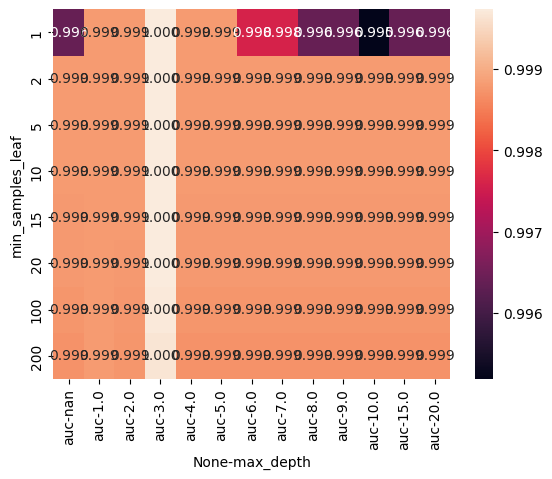

In [71]:
df_scores_pivot =df_scores.pivot(index = 'min_samples_leaf',columns = ['max_depth'],values =['auc'])
df_scores_pivot.round(3)
sns.heatmap(df_scores_pivot,annot = True,fmt =".3f")

In [72]:
dt = DecisionTreeClassifier(max_depth = 3,min_samples_leaf = 15 )
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [73]:
y_pred = dt.predict_proba(x_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
auc

0.9997283532439782

In [74]:
#we want to try now the random forest classifier
rf = RandomForestClassifier(n_estimators=10,random_state = 1)
rf.fit(x_train,y_train)
y_pred =rf.predict_proba(x_val)[:,1]
roc_auc_score(y_val,y_pred)


0.9986599771756022

In [75]:
#we can see that the random forest is showing the same performance on the auc of 99% which makes me wonder on the overfitting if also available here
#Now we want to make our predict function
def predict(df,dv,dt):
    dicts = df[categorical_vars + numerical_vars].to_dict(orient = 'records')
    x = dv.transform(dicts)
    y_pred = dt.predict_proba(x)[:,1]
    return y_pred

In [76]:
#now we want to save our model
output_file = f'model=.bin'
output_file

'model=.bin'

In [77]:
f_out = open(output_file,'wb')
pickle.dump((dv,dt),f_out)
f_out.close()

In [78]:
#I want to download my notebook and use
df.iloc[10]

customerid             15719508
surname                   davis
creditscore                 528
geography                france
gender                     male
age                          31
tenure                        6
balance               102016.72
numofproducts                 2
hascrcard                    no
isactivemember               no
estimatedsalary        80181.12
exited                       no
complain                     no
satisfaction_score            3
card_type                  gold
point_earned                264
Name: 10, dtype: object

In [79]:
{
        customerid :15719508,
        surname : 'davis',
        creditscore :528,
        geography :  'france',
        gender     :  'male',
        age         :  31,
        tenure       : 6,
        balance       : 102016.72,
        numofproducts  :   2,
        hascrcard       :   'no',
        isactivemember   : 'no',
        estimatedsalary   :  80181.12,
        complain            : 'no',
        satisfaction_score   :  3,
        card_type  :  'gold',
        point_earned           : 264

_IncompleteInputError: incomplete input (4008721476.py, line 17)